In [15]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm, colors
#from numba import compiler, types
from scipy.integrate import ode


from numba import compiler, types

 # Quadratic Integrate and Fire 
 \begin{cases} 
       C \dot{V} = a(V-b)(V-d)-U+I       \\
       \dot{U} = e(f(V-b)-U) \\
       V=m,\space U=U+n, если \space V \geq V_{peak}
   \end{cases}
  
V - мембранный потенциал.  U - (потоки Кальция?). C - мембранная емкость. b - мембранный потенциал покоя. d - мгновенный пороговый потенциал. e - постоянная времени восстановления. n - сумма токов.




In [151]:

h = 0.01 # шаг интегрирования 
def system(t, state, params):
    a, b, C, d, e, f, m, n, vpeak, I  = params 
    
    
    #все, кроме h, - параметры модели 
    
    v, u = state 
    
    if(v>=vpeak): #эта функция очень упрощенная, тут идет просто перестановка значений 
        print("peak")
        vnew = m
        unew = u+n
        return np.array([vnew, unew]) 
    
    vnew = (a*(v-b)*(v-d)-u+I)/C
    unew = e*(f*(v-b)-u)
    
    # на данный момент неэффектиная часть функции 
    if(vnew + h*(a*(vnew-b)*(vnew-d)-unew+I)/C >= vpeak):
        #print("cutoff")
        vnew = vpeak
        #print(vnew)
    
 
    return np.array([vnew, unew])
    
    
    
    

In [152]:
a = 0.5
b = -60.0
C = 50.0 
d = -45.0
e = 0.02
f = 0.5 
m = -50
n =  50 
vpeak = 40.0
I = 100.0
params = np.array([a, b, C, d, e, f, m, n, vpeak, I])
s0 = [0.0, 0.0 ]
t0 = 0.0
t_end = 100.0

In [153]:
# Интегратор 
prop = ode(system)
prop.set_integrator('dop853')
prop.set_f_params(params)
prop.set_initial_value(s0, t0)

In [154]:
#%%timeit
prop.set_initial_value(s0, t0)
 

v_u = np.array([prop.y])
t_values = [0.0]
while prop.successful() and prop.t < t_end:
    t_values.append(prop.t+h)
    prop.integrate(prop.t+h)
    print(prop.y)
    v_u = np.append(v_u, [prop.y ], axis = 0  )



[0.29153007 0.00601395]
[0.58615333 0.012056  ]
[0.88392016 0.01812646]
[1.18488201 0.02422564]
[1.4890915  0.03035385]
[1.79660239 0.03651142]
[2.10746963 0.04269868]
[2.42174939 0.04891595]
[2.73949913 0.05516358]
[3.06077758 0.0614419 ]
[3.3856448  0.06775127]
[3.71416225 0.07409205]
[4.04639276 0.08046459]
[4.38240065 0.08686927]
[4.7222517  0.09330645]
[5.06601325 0.09977652]
[5.41375421 0.10627987]
[5.76554511 0.11281689]
[6.12145819 0.11938799]
[6.48156737 0.12599357]
[6.84594839 0.13263404]
[7.2146788  0.13930985]
[7.58783804 0.1460214 ]
[7.96550751 0.15276915]
[8.34777059 0.15955355]
[8.73471276 0.16637504]
[9.13041251 0.17323421]
[9.53041251 0.18013192]
[9.93041251 0.18706824]
[10.33041251  0.19404317]
[10.73041251  0.2010567 ]
[11.13041251  0.20810883]
[11.53041251  0.21519954]
[11.93041251  0.22232883]
[12.33041251  0.22949669]
[12.73041251  0.23670311]
[13.13041251  0.24394809]
[13.53041251  0.25123161]
[13.93041251  0.25855367]
[14.33041251  0.26591427]
[14.73041251  0.27

peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
peak
[40.00000074  0.82088096]


/home/kamilla/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dop853: larger nsteps is needed
  self.messages.get(istate, unexpected_istate_msg)))


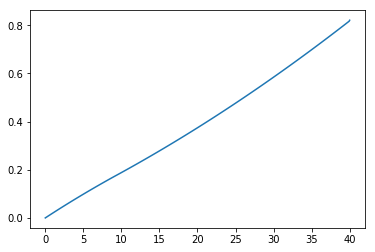

In [156]:
plt.plot(v_u[:,0], v_u[:,1], "-")

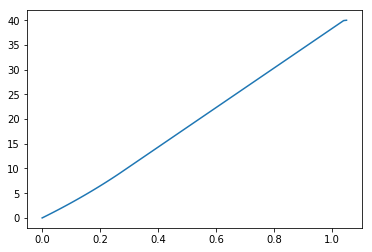

In [157]:
plt.plot(t_values, v_u[:,0], "-")

In [67]:
q = np.array([[1, 2]] )

q =np.append(q, [[3,4]], axis = 0)
print(q)

[[1 2]
 [3 4]]
